##BLUE SKY COMPETITION

## Importing the data

In [ ]:
!wget https://raw.githubusercontent.com/Adwait01-Bhosale/Blue_Sky/master/AirQuality.csv

--2022-01-29 16:46:52--  https://raw.githubusercontent.com/Adwait01-Bhosale/Blue_Sky/master/AirQuality.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 785065 (767K) [text/plain]
Saving to: ‘AirQuality.csv.2’

AirQuality.csv.2    100%[===================>] 766.67K  --.-KB/s    in 0.05s   

2022-01-29 16:46:52 (13.6 MB/s) - ‘AirQuality.csv.2’ saved [785065/785065]



## Importing all the Required models

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from datetime import datetime, timedelta
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("/content/AirQuality.csv",delimiter=";",sep=",",decimal=",")

In [ ]:
df.head() 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df.shape

(9471, 17)

In [ ]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [ ]:
df = df[6:342]

In [ ]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
337,24/03/2004,19.00.00,4.5,1501.0,556.0,20.2,1302.0,247.0,681.0,134.0,2008.0,1311.0,10.7,67.3,0.8643,NaN,NaN
338,24/03/2004,20.00.00,3.5,1273.0,458.0,14.4,1130.0,190.0,795.0,136.0,1744.0,1071.0,10.8,65.7,0.8486,NaN,NaN
339,24/03/2004,21.00.00,2.6,1179.0,214.0,9.4,955.0,169.0,928.0,125.0,1571.0,899.0,10.3,66.3,0.8336,NaN,NaN
340,24/03/2004,22.00.00,1.7,1047.0,97.0,5.9,809.0,118.0,1064.0,108.0,1435.0,766.0,10.1,66.9,0.8248,NaN,NaN
341,24/03/2004,23.00.00,1.3,973.0,79.0,4.5,739.0,81.0,1186.0,87.0,1354.0,589.0,10.4,61.1,0.7717,NaN,NaN


In [ ]:
# date
df['DateTime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H.%M.%S')
print(df['DateTime'].iloc[:2])

6   2004-03-11 00:00:00
7   2004-03-11 01:00:00
Name: DateTime, dtype: datetime64[ns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,DateTime
337,24/03/2004,19.00.00,4.5,1501.0,556.0,20.2,1302.0,247.0,681.0,134.0,2008.0,1311.0,10.7,67.3,0.8643,NaN,NaN,2004-03-24 19:00:00
338,24/03/2004,20.00.00,3.5,1273.0,458.0,14.4,1130.0,190.0,795.0,136.0,1744.0,1071.0,10.8,65.7,0.8486,NaN,NaN,2004-03-24 20:00:00
339,24/03/2004,21.00.00,2.6,1179.0,214.0,9.4,955.0,169.0,928.0,125.0,1571.0,899.0,10.3,66.3,0.8336,NaN,NaN,2004-03-24 21:00:00
340,24/03/2004,22.00.00,1.7,1047.0,97.0,5.9,809.0,118.0,1064.0,108.0,1435.0,766.0,10.1,66.9,0.8248,NaN,NaN,2004-03-24 22:00:00
341,24/03/2004,23.00.00,1.3,973.0,79.0,4.5,739.0,81.0,1186.0,87.0,1354.0,589.0,10.4,61.1,0.7717,NaN,NaN,2004-03-24 23:00:00


In [ ]:
df = df.drop(['Date','Time','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','RH','AH','Unnamed: 15','Unnamed: 16'], axis = 1)

In [ ]:
df.to_csv('fulldataset.csv')

In [ ]:
fulldataset = pd.read_csv('/content/fulldataset.csv',index_col='DateTime')
fulldataset

,Unnamed: 0,CO(GT),T
DateTime,,,
2004-03-11 00:00:00,6,1.2,11.3
2004-03-11 01:00:00,7,1.0,10.7
2004-03-11 02:00:00,8,0.9,10.7
2004-03-11 03:00:00,9,0.6,10.3
2004-03-11 04:00:00,10,NaN,10.1
...,...,...,...
2004-03-24 19:00:00,337,4.5,10.7
2004-03-24 20:00:00,338,3.5,10.8
2004-03-24 21:00:00,339,2.6,10.3


In [ ]:
fulldataset = fulldataset.drop(['Unnamed: 0'],axis =1)

## Interpolating the the `Outliers`

In [ ]:
# fill NaN
interpolateList = [x for x in fulldataset.columns if x not in ['T']]

# interpolation 
for col in interpolateList:
    fulldataset[col].interpolate(method='linear', inplace=True)
    
print('Are there any NaN value: ', fulldataset.isnull().values.any())

Are there any NaN value:  False


## Taking First 8 days of data for `Training`

In [ ]:
train_data = fulldataset[:168]
test_data = fulldataset[168:]

In [ ]:
train_data.to_csv("train_data.csv")

In [ ]:
test_data.to_csv("test_data.csv")

## CO(GT) FORECASTING

In [ ]:
train_data_01 = pd.read_csv('/content/train_data.csv',index_col = [0],parse_dates=True)
train_data_01.head(2)

,CO(GT),T
DateTime,,
2004-03-11 00:00:00,1.2,11.3
2004-03-11 01:00:00,1.0,10.7


In [ ]:
train_data_01 = train_data_01.drop(['T'],axis = 1)
train_data_01

,CO(GT)
DateTime,
2004-03-11 00:00:00,1.20
2004-03-11 01:00:00,1.00
2004-03-11 02:00:00,0.90
2004-03-11 03:00:00,0.60
2004-03-11 04:00:00,0.65
...,...
2004-03-17 19:00:00,7.60
2004-03-17 20:00:00,6.70
2004-03-17 21:00:00,5.70


## Plotting a Box Plot for `CO`

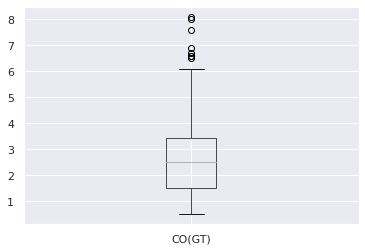

In [ ]:
boxplot_CO = train_data_01.boxplot(column=['CO(GT)']) 

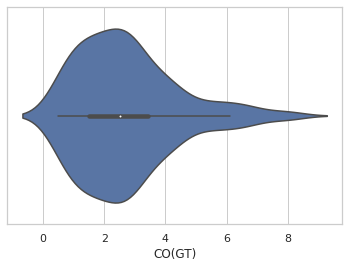

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=train_data_01['CO(GT)'])

## Plotting the relation between CO(GT) and Date Time

Text(0.5, 0, 'Dates')

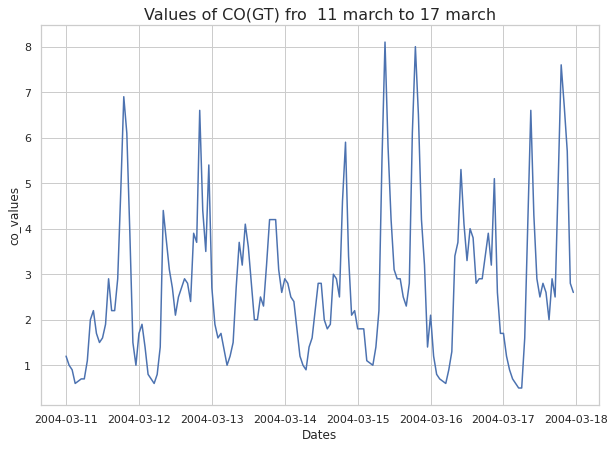

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(train_data_01["CO(GT)"])
plt.ylabel("co_values")
plt.title("Values of CO(GT) fro  11 march to 17 march",fontsize=16)
plt.xlabel("Dates")

In [ ]:
def transform_to_hour_cols(series):
    df = pd.DataFrame()

    start = series.index.min()
    end = series.index.max()
    
    df['year'] = series.index.year
    df['month'] = series.index.month
    df['day'] = series.index.day
    df['hours'] = series.index.hour
    df['loads'] = series.values
    
    df = df.set_index(['year', 'month', 'day', 'hours'], append=True).unstack()
    df = df.groupby(['year', 'month', 'day']).sum()
    
    df.reset_index(inplace=True)
    df.drop(['year', 'month', 'day'], axis=1, inplace=True)
    
    date_list = pd.date_range(start=start, end=end, freq='D').strftime('%Y-%m-%d')
    
    df.index = pd.DatetimeIndex(date_list, name='date')
    
    return df

dataf = transform_to_hour_cols(train_data_01['CO(GT)'])
dataf

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


loads                            ...                              
hours         0    1    2    3     4    5   ...   18   19   20   21   22   23
date                                        ...                              
2004-03-11   1.2  1.0  0.9  0.6  0.65  0.7  ...  4.8  6.9  6.1  3.9  1.5  1.0
2004-03-12   1.7  1.9  1.4  0.8  0.70  0.6  ...  3.9  3.7  6.6  4.4  3.5  5.4
2004-03-13   2.7  1.9  1.6  1.7  1.35  1.0  ...  3.2  4.2  4.2  4.2  3.1  2.6
2004-03-14   2.9  2.8  2.5  2.4  1.80  1.2  ...  2.5  4.6  5.9  3.4  2.1  2.2
2004-03-15   1.8  1.8  1.8  1.1  1.05  1.0  ...  6.1  8.0  6.5  4.2  3.2  1.4
2004-03-16   2.1  1.2  0.8  0.7  0.65  0.6  ...  3.4  3.9  3.2  5.1  2.6  1.7
2004-03-17   1.7  1.2  0.9  0.7  0.60  0.5  ...  5.0  7.6  6.7  5.7  2.8  2.6

[7 rows x 24 columns]

In [ ]:
dataf.shape

(7, 24)

## Normalising the data 

In [ ]:
def normalize_df(data):
    
    #normalize the dataset for working with the lstm 
    scaler = MinMaxScaler().fit(data.values)
    data_normd = scaler.transform(data.values)
    
    #return as dataframe
    data = pd.DataFrame(data_normd, index=data.index, columns=data.columns)
    
    return data, scaler

In [ ]:
#normalize the energy dataframe
data_normed, scaler = normalize_df(dataf)

In [ ]:
data_normed.shape

(7, 24)

In [ ]:
def split_sequences(sequences, n_steps, extra_lag=False, long_lag_step=7, max_step=30, idx=0, multivar=False):
    """
    n_step - is the number of consecutive past steps from the target day to construct
    long_lag_step - is the size of the trailing lag beyond the n_steps. Ie. if n_steps is 3, and long_lag_step is 7 will return day -1, -2, -3, -7, -14 etc to max_step
    idx - is the starting index for the first slice
    multivari - true if the input data has multiple variable structure. false for univariate
    """
    
    #if not adding extra lag features adjust max_step and n_steps to align
    if not extra_lag:
        max_step=n_steps
        n_steps+=1
        
    
    X, y = list(), list()
    for i in range(len(sequences)):
        
        # find the end of this pattern
        #end_ix = i + n_steps
        end_ix = i + max_step
        
        #create a list with the indexes we want to include in each sample
        slices = [x for x in range(end_ix-1,end_ix-n_steps, -1)] + [y for y in range(end_ix-n_steps, i, -long_lag_step)]
        
        #reverse the slice indexes
        slices = list(reversed(slices))
        
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break

        # gather input and output parts of the pattern
        seq_x = sequences[slices, :]
        seq_y = sequences[end_ix, :]

        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)
    
    if multivar:
        #unstack the 3rd dimension and select the first element(energy load)
        y = y[:,idx]
    
    return X, y

In [ ]:
# Create a function to plot the time series data 
def plot_time_series(data,format=".",start=0,end=None,label=None):
  """
  Plot time steps (a series of points in time) against values (a series of values across timesteps)

  Parameters:
  ---------
  timesteps: array of timesteps values
  values: array of values across time 
  start: wher to start the plot (settign a value will index from strat of timesteps)
  end: where to end the plot (similar to start but for the end)
  label: label to show on the plot about the values
  """

  # Plot the series
  plt.plot(data,format,label=label)
  plt.xlabel("Time")
  plt.ylabel("CO(GT) Values")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [ ]:
#creating the supervised learning problem
n_steps = 8

X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 6, idx=0, multivar=False)
print(X.shape, Y.shape)
X[:5], Y[:5]

(1, 7, 24) (1, 24)


(array([[[0.29411765, 0.11111111, 0.05882353, 0.05555556, 0.        ,
          0.        , 0.        , 0.53846154, 0.65853659, 0.76923077,
          0.63414634, 0.51851852, 0.45      , 0.42857143, 0.4       ,
          0.1       , 0.875     , 0.33333333, 0.69444444, 0.90697674,
          1.        , 1.        , 0.65      , 0.36363636],
         [0.        , 0.        , 0.05882353, 0.        , 0.04166667,
          0.28571429, 0.22222222, 0.15384615, 0.14634146, 0.09230769,
          0.        , 0.        , 0.        , 0.        , 0.55      ,
          0.3       , 0.        , 1.        , 0.63888889, 0.74418605,
          0.82857143, 0.2173913 , 0.        , 0.        ],
         [0.29411765, 0.5       , 0.35294118, 0.11111111, 0.08333333,
          0.14285714, 0.33333333, 0.38461538, 0.73170732, 0.33076923,
          0.34146341, 0.44444444, 0.25      , 0.28571429, 0.45      ,
          1.        , 0.75      , 0.16666667, 0.38888889, 0.        ,
          0.97142857, 0.43478261, 1.      

## Stacked LSTM model

In [ ]:
#define the model
n_hours = X.shape[-1]
n_lags = X.shape[1]
cells=512
learning_rate=5e-3
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.GRU(256, activation='relu',kernel_initializer="he_normal", return_sequences=True))
model.add(tf.keras.layers.LSTM(cells, activation='relu', return_sequences=True, input_shape=(n_lags, n_hours)))
model.add(tf.keras.layers.LSTM(int(cells/2), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(n_hours))
#define the learning rate
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    
#compile model
model.compile(optimizer=optimizer, loss='mae')
history_8th_day=model.fit(X, Y, epochs= 300, shuffle=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 0.4804
Epoch 2/300
1/1 [==============================] - 0s 51ms/step - loss: 4.1102
Epoch 3/300
1/1 [==============================] - 0s 56ms/step - loss: 0.4153
Epoch 4/300
1/1 [==============================] - 0s 51ms/step - loss: 0.4300
Epoch 5/300
1/1 [==============================] - 0s 57ms/step - loss: 0.3874
Epoch 6/300
1/1 [==============================] - 0s 54ms/step - loss: 0.3258
Epoch 7/300
1/1 [==============================] - 0s 52ms/step - loss: 0.2261
Epoch 8/300
1/1 [==============================] - 0s 54ms/step - loss: 0.4854
Epoch 9/300
1/1 [==============================] - 0s 56ms/step - loss: 0.1952
Epoch 10/300
1/1 [==============================] - 0s 64ms/step - loss: 0.2133
Epoch 11/300
1/1 [==============================] - 0s 57ms/step - loss: 0.2677
Epoch 12/300
1/1 [==============================] - 0s 53ms/step - loss: 0.2984
Epoch 13/300
1/1 [==============================] -

In [ ]:
model.save("LSTM_GRU_model.h5")

In [ ]:
#initalize lists to capture the output
predictions = []
actuals = []
#make predictions
predict = model.predict(X)
#inverse transform the predictions and actual values
prediction = scaler.inverse_transform(predict)
actual = scaler.inverse_transform(Y.copy())

#save the results in a list
predictions.append(prediction)
actuals.append(actual)

predictions = np.array(predictions)
actuals = np.array(actuals)

In [ ]:
test_data.head()

,CO(GT),T
DateTime,,
2004-03-18 00:00:00,2.30,14.8
2004-03-18 01:00:00,1.40,14.3
2004-03-18 02:00:00,1.00,14.8
2004-03-18 03:00:00,0.70,13.9
2004-03-18 04:00:00,0.65,11.6


In [ ]:
test_data = test_data['CO(GT)']
testday8 = test_data[:24]
testday8 = np.array([testday8])
testday8 = np.array([testday8])
testday8.shape

(1, 1, 24)

In [ ]:
testday8 = testday8.reshape(-1)
predictions = predictions.reshape(-1)

In [ ]:
print("actual",testday8)
print("prediction", predictions) 

actual [2.3  1.4  1.   0.7  0.65 0.6  0.7  1.5  4.7  6.6  4.5  2.8  2.2  2.2
 2.3  2.2  2.8  2.7  3.7  5.1  5.1  3.2  2.1  1.7 ]
prediction [1.7039127  1.2208163  0.94643784 0.68613935 0.59365946 0.5054908
 0.48458332 1.6332562  4.2685757  6.966224   4.270825   2.9780648
 2.561227   2.890186   2.6591623  1.9911908  2.9311512  2.5101416
 5.108381   7.7561183  6.9289293  5.821812   2.904791   2.737539  ]


##DAY 8 CALCULATION FOR CO(GT)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
co_mape1 = mean_absolute_percentage_error(testday8,predictions)
print('DAY 8 MAPE FOR CO(GT) --> ',co_mape1)

DAY 8 MAPE FOR CO(GT) -->  0.2200902977841356


In [ ]:
testday8[:5]

array([2.3 , 1.4 , 1.  , 0.7 , 0.65])

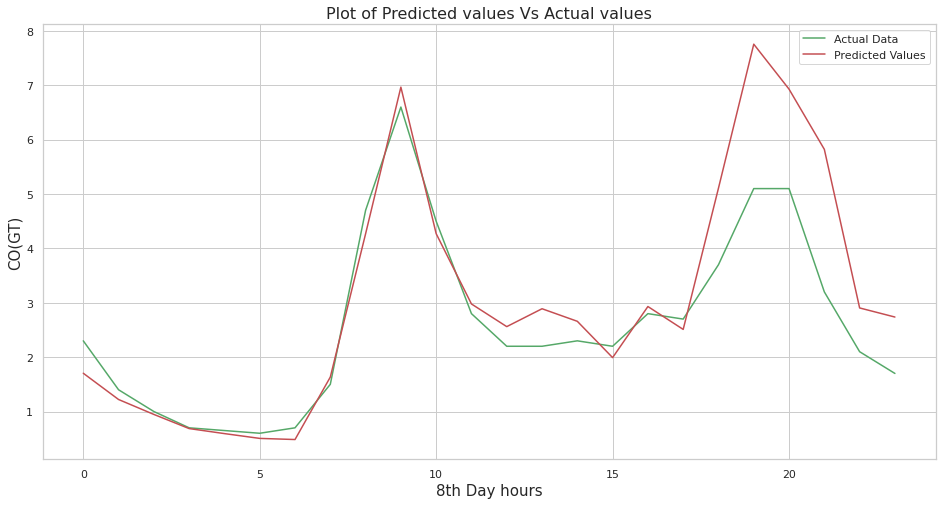

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday8,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('8th Day hours',fontsize=15)
plt.ylabel('CO(GT)',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

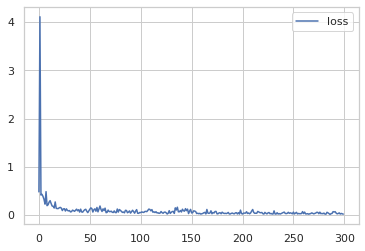

In [ ]:
import pandas as pd
pd.DataFrame(history_8th_day.history).plot();

In [ ]:
###define an LSTM model
def lstm(n_lags, n_hours, cells=50, learning_rate=5e-3):
    
    #define the model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.GRU(256, activation='relu',kernel_initializer="he_normal", return_sequences=True))
    model.add(tf.keras.layers.LSTM(cells, activation='relu', return_sequences=True, input_shape=(n_lags, n_hours)))
    model.add(tf.keras.layers.LSTM(int(cells/2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(n_hours))
    
    #define the learning rate
    optimizer = tf.keras.optimizers.Adam(lr=learning_rate)
    
    #compile model
    model.compile(optimizer=optimizer, loss='mae')
    
    return model

def pred(model):
  #initalize lists to capture the output
  predictions = []
  actuals = []
  #make predictions
  predict = model.predict(X)
  #inverse transform the predictions and actual values
  prediction = scaler.inverse_transform(predict)
  actual = scaler.inverse_transform(Y.copy())
  
  #save the results in a list
  predictions.append(prediction)
  actuals.append(actual)
  predictions = np.array(predictions)
  actuals = np.array(actuals)

  return predictions,actuals

##DAY 9 MAPE CALCULATION FOR CO(GT)

In [ ]:

#Updating the next day data
train_data_02 = fulldataset[:192]
test_data_02 = fulldataset[192:]

#Saving the new dataframe
train_data_02.to_csv("train_data_02.csv")
test_data_02.to_csv("test_data_02.csv")

train_data_02 = pd.read_csv('/content/train_data_02.csv',index_col = [0],parse_dates=True)
train_data_02 = train_data_02.drop(['T'],axis = 1)

dataf = transform_to_hour_cols(train_data_02['CO(GT)'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 9
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 7, idx=0, multivar=False)

n_hour = X.shape[-1]
n_lag = X.shape[1]
#model
model = lstm(n_lags = n_lag, n_hours = n_hour)
history_9th_day=model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_02 = test_data_02['CO(GT)']
testday9 = test_data_02[0:24]
testday9 = np.array([testday9])
testday9 = np.array([testday9])
testday9 = testday9.reshape(-1)

#Calculation for MAPE
co_mape2 = mean_absolute_percentage_error(testday9,predictions)
print('DAY 9 MAPE FOR CO(GT) -- >' , co_mape2)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 9 MAPE FOR CO(GT) -- > 0.1590087746067832


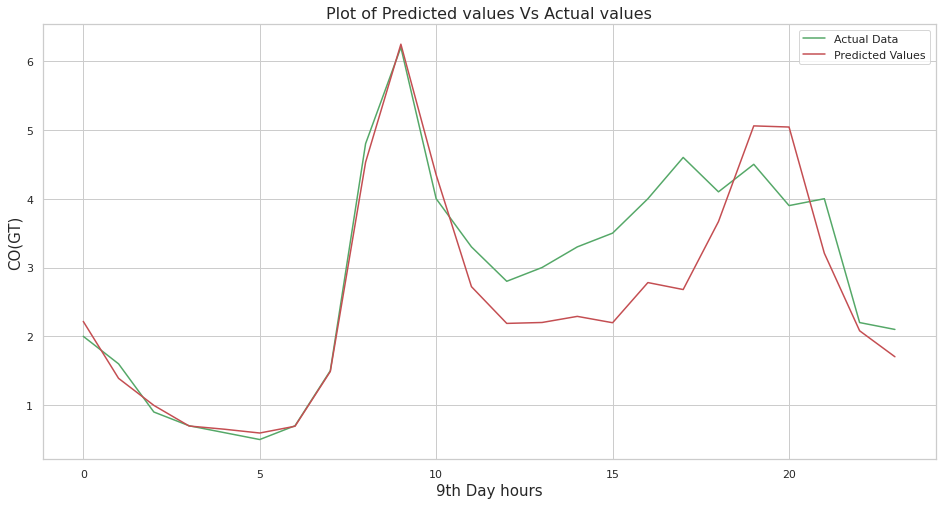

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday9,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('9th Day hours',fontsize=15)
plt.ylabel('CO(GT)',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

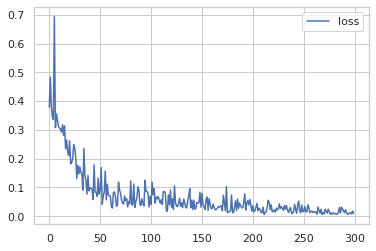

In [ ]:
import pandas as pd
pd.DataFrame(history_9th_day.history).plot();

## DAY 10 MAPE CALCULATION FOR CO(GT)

In [ ]:

#Updating the next day data
train_data_03 = fulldataset[:216]
test_data_03 = fulldataset[216:]

#Saving the new dataframe
train_data_03.to_csv("train_data_03.csv")
test_data_03.to_csv("test_data_03.csv")

train_data_03 = pd.read_csv('/content/train_data_03.csv',index_col = [0],parse_dates=True)
train_data_03 = train_data_03.drop(['T'],axis = 1)

dataf = transform_to_hour_cols(train_data_03['CO(GT)'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 10
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 8, idx=0, multivar=False)

n_hour = X.shape[-1]
n_lag = X.shape[1]
#model
model = lstm(n_lags = n_lag, n_hours = n_hour)
history_10th_day=model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_03 = test_data_03['CO(GT)']
testday10 = test_data_03[0:24]
testday10 = np.array([testday10])
testday10 = np.array([testday10])
testday10 = testday10.reshape(-1)

#Calculation for MAPE
co_mape3 = mean_absolute_percentage_error(testday10,predictions)
print('DAY 10 MAPE FOR CO(GT) -- >' , co_mape3)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 10 MAPE FOR CO(GT) -- > 0.47192265208226036


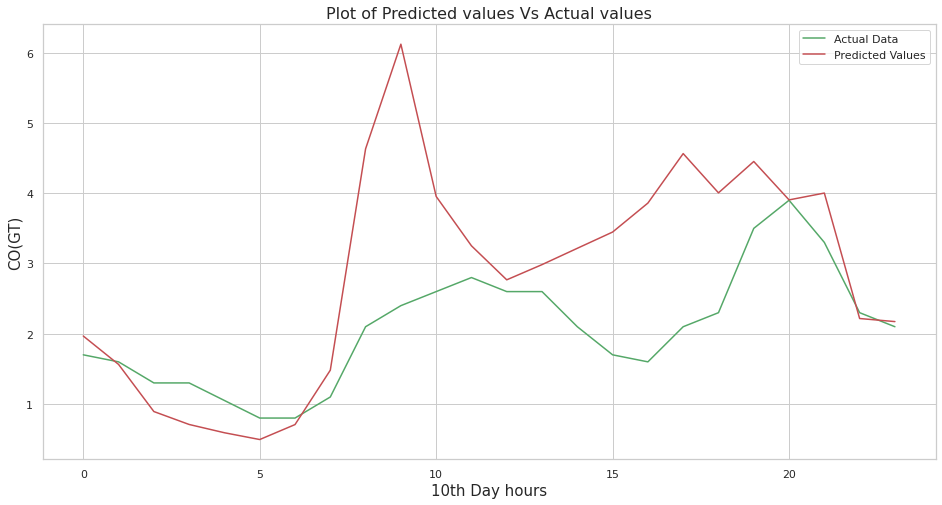

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday10,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('10th Day hours',fontsize=15)
plt.ylabel('CO(GT)',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

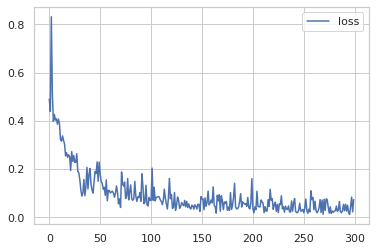

In [ ]:
import pandas as pd
pd.DataFrame(history_10th_day.history).plot();

##DAY 11 MAPE CALCULATION FOR CO(GT)

In [ ]:

#Updating the next day data
train_data_04 = fulldataset[:240]
test_data_04 = fulldataset[240:]

#Saving the new dataframe
train_data_04.to_csv("train_data_04.csv")
test_data_04.to_csv("test_data_04.csv")

train_data_04 = pd.read_csv('/content/train_data_04.csv',index_col = [0],parse_dates=True)
train_data_04 = train_data_04.drop(['T'],axis = 1)

dataf = transform_to_hour_cols(train_data_04['CO(GT)'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 11
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 9, idx=0, multivar=False)

n_hour = X.shape[-1]
n_lag = X.shape[1]
#model
model = lstm(n_lags = n_lag, n_hours = n_hour)
history_11th_day=model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_04 = test_data_04['CO(GT)']
testday11 = test_data_04[0:24]
testday11 = np.array([testday11])
testday11 = np.array([testday11])
testday11 = testday11.reshape(-1)

#Calculation for MAPE
co_mape4 = mean_absolute_percentage_error(testday11,predictions)
print('DAY 11 MAPE FOR CO(GT) -- >' , co_mape4)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 11 MAPE FOR CO(GT) -- > 0.3033819631855403


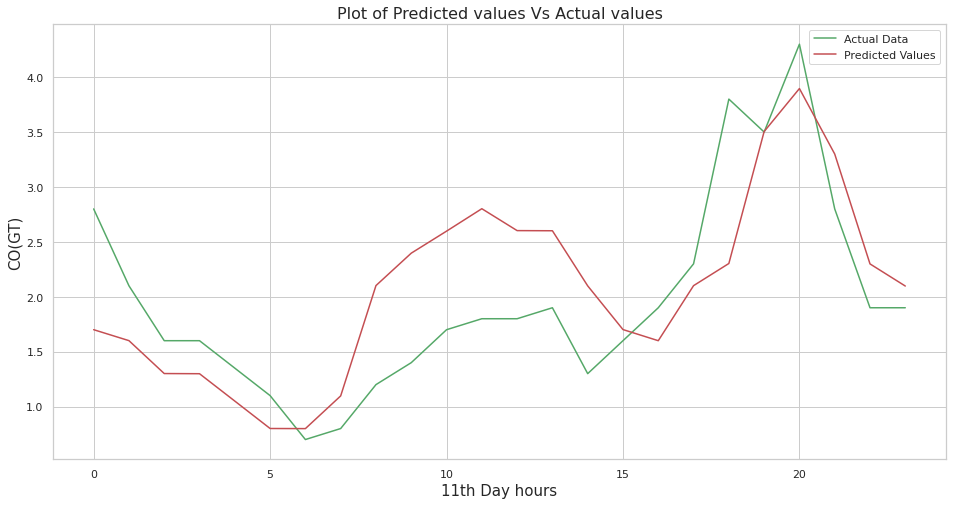

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday11,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('11th Day hours',fontsize=15)
plt.ylabel('CO(GT)',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

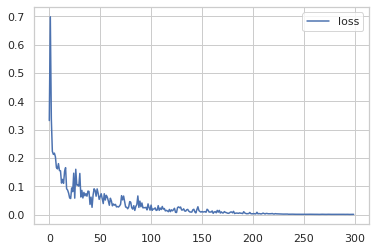

In [ ]:
import pandas as pd
pd.DataFrame(history_11th_day.history).plot();

##DAY 12 MAPE CALCULATION FOR CO(GT)

In [ ]:

#Updating the next day data
train_data_05 = fulldataset[:264]
test_data_05 = fulldataset[264:]

#Saving the new dataframe
train_data_05.to_csv("train_data_05.csv")
test_data_05.to_csv("test_data_05.csv")

train_data_05 = pd.read_csv('/content/train_data_05.csv',index_col = [0],parse_dates=True)
train_data_05 = train_data_05.drop(['T'],axis = 1)

dataf = transform_to_hour_cols(train_data_05['CO(GT)'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 12
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 10, idx=0, multivar=False)

n_hour = X.shape[-1]
n_la = X.shape[1]
#model
model = lstm(n_lags = n_la, n_hours = n_hour)
history_12th_day = model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_05 = test_data_05['CO(GT)']
testday12 = test_data_05[0:24]
testday12 = np.array([testday12])
testday12 = np.array([testday12])
testday12 = testday12.reshape(-1)

#Calculation for MAPE
co_mape5 = mean_absolute_percentage_error(testday12,predictions)
print('DAY 12 MAPE FOR CO(GT) -- >' , co_mape5)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 12 MAPE FOR CO(GT) -- > 0.6428422259212377


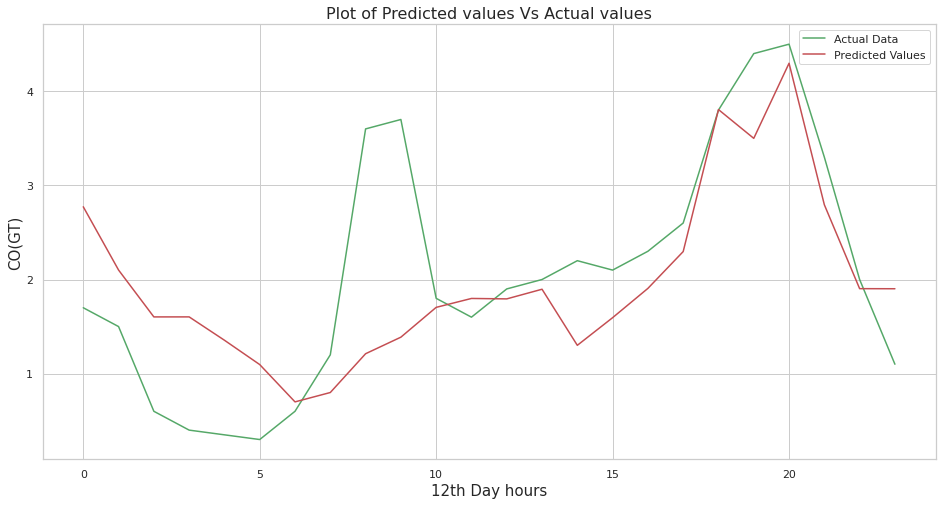

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday12,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('12th Day hours',fontsize=15)
plt.ylabel('CO(GT)',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

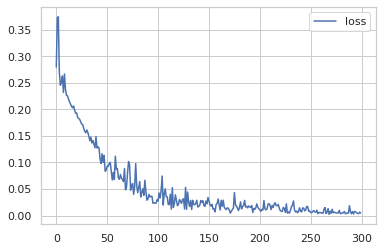

In [ ]:
import pandas as pd
pd.DataFrame(history_12th_day.history).plot();

DAY 13 MAPE CALCULATION FOR CO(GT)

In [ ]:

#Updating the next day data
train_data_06 = fulldataset[:288]
test_data_06 = fulldataset[288:]

#Saving the new dataframe
train_data_06.to_csv("train_data_06.csv")
test_data_06.to_csv("test_data_06.csv")

train_data_06 = pd.read_csv('/content/train_data_06.csv',index_col = [0],parse_dates=True)
train_data_06 = train_data_06.drop(['T'],axis = 1)

dataf = transform_to_hour_cols(train_data_06['CO(GT)'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 13
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 11, idx=0, multivar=False)

n_hour = X.shape[-1]
n_la = X.shape[1]
#model
model = lstm(n_lags = n_la, n_hours = n_hour)
history_13th_day = model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_06 = test_data_06['CO(GT)']
testday13 = test_data_06[0:24]
testday13 = np.array([testday13])
testday13 = np.array([testday13])
testday13 = testday13.reshape(-1)

#Calculation for MAPE
co_mape6 = mean_absolute_percentage_error(testday13,predictions)
print('DAY 13 MAPE FOR CO(GT) -- >' , co_mape6)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 13 MAPE FOR CO(GT) -- > 0.35999804071456004


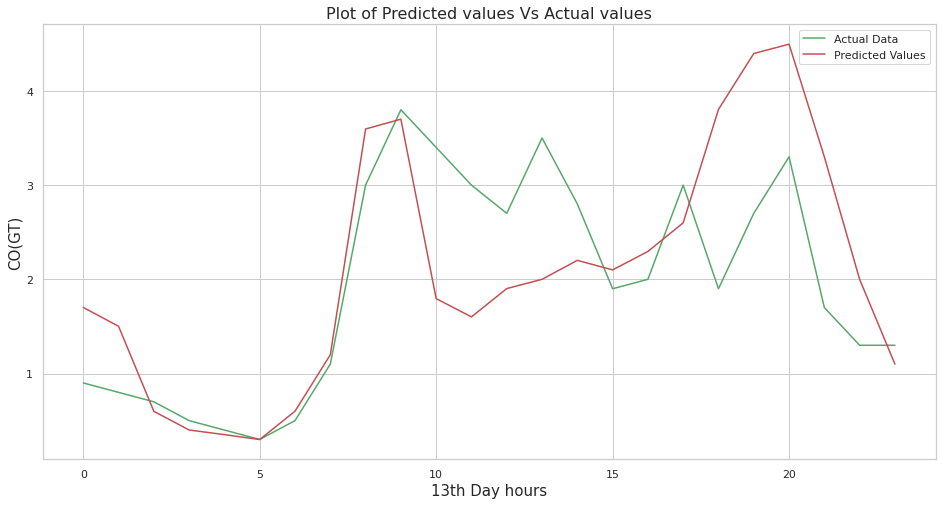

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday13,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('13th Day hours',fontsize=15)
plt.ylabel('CO(GT)',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

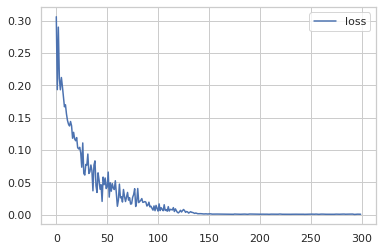

In [ ]:
import pandas as pd
pd.DataFrame(history_13th_day.history).plot();

DAY 14 CALCULATION FOR CO(GT)

In [ ]:

#Updating the next day data
train_data_07 = fulldataset[:312]
test_data_07 = fulldataset[312:]

#Saving the new dataframe
train_data_07.to_csv("train_data_07.csv")
test_data_07.to_csv("test_data_07.csv")

train_data_07 = pd.read_csv('/content/train_data_07.csv',index_col = [0],parse_dates=True)
train_data_07 = train_data_07.drop(['T'],axis = 1)

dataf = transform_to_hour_cols(train_data_07['CO(GT)'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 14
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 12, idx=0, multivar=False)

n_hour = X.shape[-1]
n_la = X.shape[1]
#model
model = lstm(n_lags = n_la, n_hours = n_hour)
history_14th_day = model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_07 = test_data_07['CO(GT)']
testday14 = test_data_07[0:24]
testday14 = np.array([testday14])
testday14 = np.array([testday14])
testday14 = testday14.reshape(-1)

#Calculation for MAPE
co_mape7 = mean_absolute_percentage_error(testday14,predictions)
print('DAY 14 MAPE FOR CO(GT) -- >' , co_mape7)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 14 MAPE FOR CO(GT) -- > 0.2986168139534348


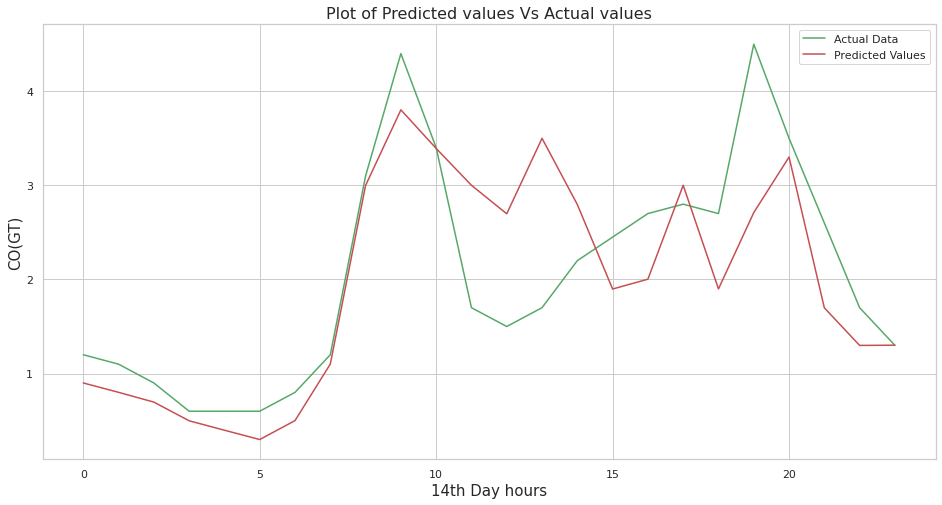

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday14,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('14th Day hours',fontsize=15)
plt.ylabel('CO(GT)',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

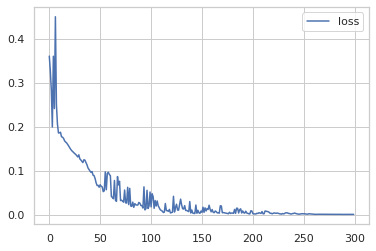

In [ ]:
import pandas as pd
pd.DataFrame(history_14th_day.history).plot();

## AVERAGE MAPE FOR 7 DAYS OF CO(GT)

In [ ]:
co_mean_mape = (co_mape1 + co_mape2 + co_mape3 + co_mape4 + co_mape5 + co_mape6 + co_mape7)/7
co_mean_mape

0.35083725260685034

# Prediction of Temperature

In [ ]:
train_data_01 = pd.read_csv('/content/train_data.csv',index_col = [0],parse_dates=True)
train_data_01.head(2)

,CO(GT),T
DateTime,,
2004-03-11 00:00:00,1.2,11.3
2004-03-11 01:00:00,1.0,10.7


In [ ]:
train_data_01 = train_data_01.drop(['CO(GT)'],axis = 1)
train_data_01

,T
DateTime,
2004-03-11 00:00:00,11.3
2004-03-11 01:00:00,10.7
2004-03-11 02:00:00,10.7
2004-03-11 03:00:00,10.3
2004-03-11 04:00:00,10.1
...,...
2004-03-17 19:00:00,23.1
2004-03-17 20:00:00,20.5
2004-03-17 21:00:00,19.1


BOX - PLOT 

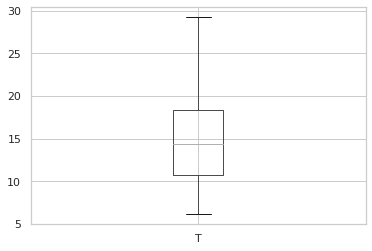

In [ ]:
boxplot_T = train_data_01.boxplot(column=['T']) 

VIOLIN PLOT

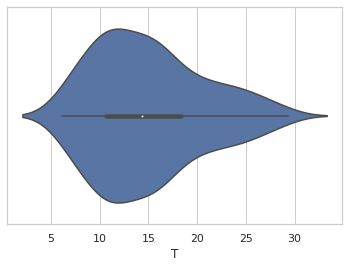

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=train_data_01['T'])

Text(0.5, 0, 'Dates')

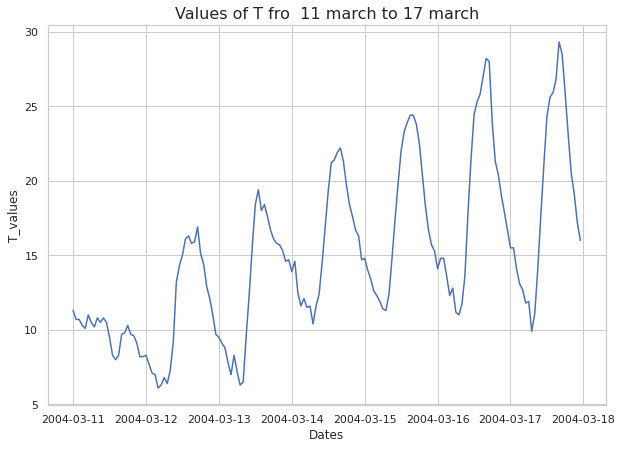

In [ ]:

plt.figure(figsize=(10,7))
plt.plot(train_data_01["T"])
plt.ylabel("T_values")
plt.title("Values of T fro  11 march to 17 march",fontsize=16)
plt.xlabel("Dates")

In [ ]:
def transform_to_hour_cols(series):
    df = pd.DataFrame()

    start = series.index.min()
    end = series.index.max()
    
    df['year'] = series.index.year
    df['month'] = series.index.month
    df['day'] = series.index.day
    df['hours'] = series.index.hour
    df['loads'] = series.values
    
    df = df.set_index(['year', 'month', 'day', 'hours'], append=True).unstack()
    df = df.groupby(['year', 'month', 'day']).sum()
    
    df.reset_index(inplace=True)
    df.drop(['year', 'month', 'day'], axis=1, inplace=True)
    
    date_list = pd.date_range(start=start, end=end, freq='D').strftime('%Y-%m-%d')
    
    df.index = pd.DatetimeIndex(date_list, name='date')
    
    return df

dataf = transform_to_hour_cols(train_data_01['T'])
dataf

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


loads                          ...                              
hours         0     1     2     3     4   ...    19    20    21    22    23
date                                      ...                              
2004-03-11  11.3  10.7  10.7  10.3  10.1  ...   9.7   9.6   9.1   8.2   8.2
2004-03-12   8.3   7.7   7.1   7.0   6.1  ...  14.4  12.9  12.1  11.0   9.7
2004-03-13   9.5   9.1   8.8   7.8   7.0  ...  15.8  15.7  15.3  14.6  14.7
2004-03-14  13.9  14.6  12.5  11.6  12.1  ...  18.4  17.6  16.7  16.3  14.7
2004-03-15  14.8  14.0  13.4  12.6  12.3  ...  20.4  18.3  16.7  15.7  15.3
2004-03-16  14.1  14.8  14.8  13.6  12.3  ...  21.3  20.4  19.0  17.9  16.7
2004-03-17  15.5  15.5  14.1  13.1  12.7  ...  23.1  20.5  19.1  17.2  16.0

[7 rows x 24 columns]

In [ ]:
dataf.shape

(7, 24)

In [ ]:
def normalize_df(data):
    
    #normalize the dataset for working with the lstm 
    scaler = MinMaxScaler().fit(data.values)
    data_normd = scaler.transform(data.values)
    
    #return as dataframe
    data = pd.DataFrame(data_normd, index=data.index, columns=data.columns)
    
    return data, scaler

In [ ]:
#normalize the energy dataframe
data_normed, scaler = normalize_df(dataf)

In [ ]:
def split_sequences(sequences, n_steps, extra_lag=False, long_lag_step=7, max_step=30, idx=0, multivar=False):
    """
    n_step - is the number of consecutive past steps from the target day to construct
    long_lag_step - is the size of the trailing lag beyond the n_steps. Ie. if n_steps is 3, and long_lag_step is 7 will return day -1, -2, -3, -7, -14 etc to max_step
    idx - is the starting index for the first slice
    multivari - true if the input data has multiple variable structure. false for univariate
    """
    
    #if not adding extra lag features adjust max_step and n_steps to aling
    if not extra_lag:
        max_step=n_steps
        n_steps+=1
        
    
    X, y = list(), list()
    for i in range(len(sequences)):
        
        # find the end of this pattern
        #end_ix = i + n_steps
        end_ix = i + max_step
        
        #create a list with the indexes we want to include in each sample
        slices = [x for x in range(end_ix-1,end_ix-n_steps, -1)] + [y for y in range(end_ix-n_steps, i, -long_lag_step)]
        
        #reverse the slice indexes
        slices = list(reversed(slices))
        
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break

        # gather input and output parts of the pattern
        seq_x = sequences[slices, :]
        seq_y = sequences[end_ix, :]

        X.append(seq_x)
        y.append(seq_y)
        
    X = np.array(X)
    y = np.array(y)
    
    if multivar:
        #unstack the 3rd dimension and select the first element(energy load)
        y = y[:,idx]
    
    return X, y

In [ ]:
#create the supervised learning problem
n_steps = 8

X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 6, idx=0, multivar=False)
print(X.shape, Y.shape)
X[:5], Y[:5]

(1, 7, 24) (1, 24)


(array([[[1.        , 1.        , 0.90909091, 0.92424242, 1.        ,
          0.84615385, 1.        , 0.72      , 0.77966102, 0.875     ,
          0.98571429, 0.97247706, 0.99328859, 1.        , 1.        ,
          0.98930481, 1.        , 1.        , 1.        , 1.        ,
          1.        , 1.        , 0.92783505, 0.91764706],
         [0.41666667, 0.38461538, 0.46753247, 0.5       , 0.60606061,
          0.72307692, 0.7254902 , 0.78      , 0.72881356, 0.23214286,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.02      , 0.13559322, 0.        ,
          0.34285714, 0.34862385, 0.36912752, 0.45086705, 0.46368715,
          0.40106952, 0.31632653, 0.37967914, 0.30769231, 0.35074627,
          0.30275229, 0.3       , 0.288659

In [ ]:

#define the model
n_hours = X.shape[-1]
n_lags = X.shape[1]
cells=512
learning_rate=5e-3
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.GRU(64, activation='relu', kernel_initializer="he_normal",return_sequences=True, input_shape=(n_lags, n_hours)))
model.add(tf.keras.layers.LSTM(cells, activation='relu', kernel_initializer="he_normal",return_sequences=True, input_shape=(n_lags, n_hours)))
model.add(tf.keras.layers.LSTM(int(cells/2), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(n_hours))
#define the learning rate
optimizer = tf.keras.optimizers.Adam(lr=learning_rate)

#compile model
model.compile(optimizer=optimizer, loss='mae')
history_8th_day = model.fit(X, Y, epochs= 300, shuffle=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.9131
Epoch 2/300
1/1 [==============================] - 0s 44ms/step - loss: 21.2264
Epoch 3/300
1/1 [==============================] - 0s 44ms/step - loss: 0.7619
Epoch 4/300
1/1 [==============================] - 0s 42ms/step - loss: 0.7077
Epoch 5/300
1/1 [==============================] - 0s 40ms/step - loss: 0.7557
Epoch 6/300
1/1 [==============================] - 0s 46ms/step - loss: 0.6158
Epoch 7/300
1/1 [==============================] - 0s 50ms/step - loss: 0.5573
Epoch 8/300
1/1 [==============================] - 0s 52ms/step - loss: 0.4247
Epoch 9/300
1/1 [==============================] - 0s 50ms/step - loss: 0.5474
Epoch 10/300
1/1 [==============================] - 0s 44ms/step - loss: 0.3612
Epoch 11/300
1/1 [==============================] - 0s 47ms/step - loss: 0.4495
Epoch 12/300
1/1 [==============================] - 0s 46ms/step - loss: 0.3398
Epoch 13/300
1/1 [==============================] 

In [ ]:
#initalize lists to capture the output
predictions = []
actuals = []
#make predictions
predict = model.predict(X)
#inverse transform the predictions and actual values
prediction = scaler.inverse_transform(predict)
actual = scaler.inverse_transform(Y.copy())

#save the results in a list
predictions.append(prediction)
actuals.append(actual)

predictions = np.array(predictions)
actuals = np.array(actuals)

In [ ]:
test_data = pd.read_csv('/content/test_data.csv',index_col = [0],parse_dates=True)
test_data.head(2)

,CO(GT),T
DateTime,,
2004-03-18 00:00:00,2.3,14.8
2004-03-18 01:00:00,1.4,14.3


In [ ]:
test_data = test_data['T']
testday8 = test_data[:24]
testday8 = np.array([testday8])
testday8 = np.array([testday8])
testday8.shape

(1, 1, 24)

In [ ]:
testday8 = testday8.reshape(-1)
predictions = predictions.reshape(-1)

In [ ]:
print("actual",testday8)
print("prediction", predictions) 

actual [14.8 14.3 14.8 13.9 11.6 12.  10.9 10.6 11.5 14.3 17.8 20.8 23.8 24.2
 25.2 27.  27.1 25.8 23.  20.7 18.6 16.  14.5 13.1]
prediction [14.629691 14.335389 13.401284 12.11559  12.210808 11.194032 11.534061
  9.723505 10.725598 13.534935 17.003805 20.58953  23.386076 23.892801
 23.643463 26.19609  27.505524 27.169737 25.10529  22.405838 19.149864
 17.870924 16.91563  15.015825]


##DAY 8 CALCULATION FOR TEMPERATURE

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
temp_mape1 = mean_absolute_percentage_error(testday8,predictions)
print('DAY 8 MAPE FOR T --> ',temp_mape1)

DAY 8 MAPE FOR T -->  0.062341400492079625


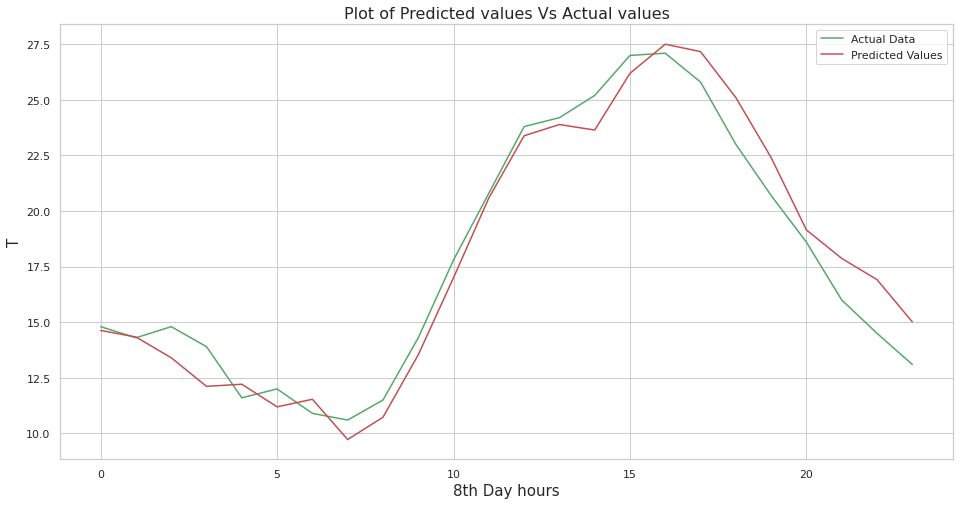

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday8,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('8th Day hours',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

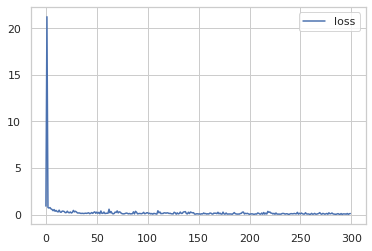

In [ ]:
import pandas as pd
pd.DataFrame(history_8th_day.history).plot();

##DAY 9 MAPE CALCULATION FOR TEMPERATURE

In [ ]:

#Updating the next day data
train_data_02 = fulldataset[:192]
test_data_02 = fulldataset[192:]

#Saving the new dataframe
train_data_02.to_csv("train_data_02.csv")
test_data_02.to_csv("test_data_02.csv")

train_data_02 = pd.read_csv('/content/train_data_02.csv',index_col = [0],parse_dates=True)
train_data_02 = train_data_02.drop(['CO(GT)'],axis = 1)

dataf = transform_to_hour_cols(train_data_02['T'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 9
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 7, idx=0, multivar=False)

n_hour = X.shape[-1]
n_lag = X.shape[1]
#model
model = lstm(n_lags = n_lag, n_hours = n_hour)
history_9th_day = model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_02 = test_data_02['T']
testday9 = test_data_02[0:24]
testday9 = np.array([testday9])
testday9 = np.array([testday9])
testday9 = testday9.reshape(-1)

#Calculation for MAPE
temp_mape2 = mean_absolute_percentage_error(testday9,predictions)
print('DAY 9 MAPE FOR T -- >' , temp_mape2)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 9 MAPE FOR T -- > 0.26023228793361763


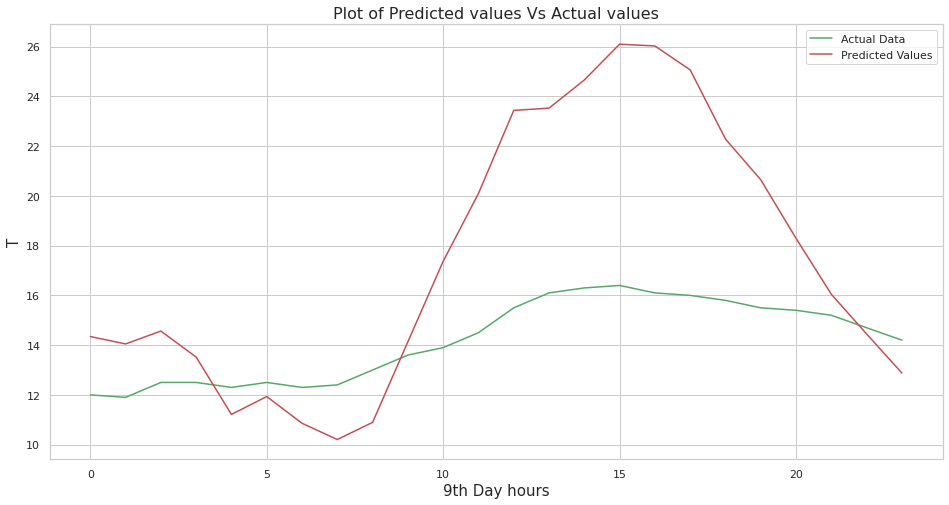

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday9,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('9th Day hours',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

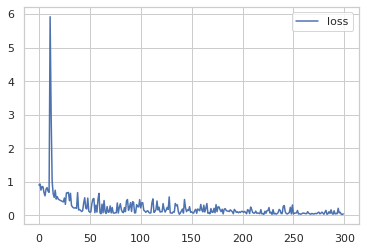

In [ ]:
import pandas as pd
pd.DataFrame(history_9th_day.history).plot();

## DAY 10 MAPE CALCULATION FOR TEMPERATURE

In [ ]:

#Updating the next day data
train_data_03 = fulldataset[:216]
test_data_03 = fulldataset[216:]

#Saving the new dataframe
train_data_03.to_csv("train_data_03.csv")
test_data_03.to_csv("test_data_03.csv")

train_data_03 = pd.read_csv('/content/train_data_03.csv',index_col = [0],parse_dates=True)
train_data_03 = train_data_03.drop(['CO(GT)'],axis = 1)

dataf = transform_to_hour_cols(train_data_03['T'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 10
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 8, idx=0, multivar=False)

n_hour = X.shape[-1]
n_lag = X.shape[1]
#model
model = lstm(n_lags = n_lag, n_hours = n_hour)
history_10th_day = model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_03 = test_data_03['T']
testday10 = test_data_03[0:24]
testday10 = np.array([testday10])
testday10 = np.array([testday10])
testday10 = testday10.reshape(-1)

#Calculation for MAPE
temp_mape3 = mean_absolute_percentage_error(testday10,predictions)
print('DAY 10 MAPE FOR T -- >' , temp_mape3)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 10 MAPE FOR T -- > 0.10787079558911898


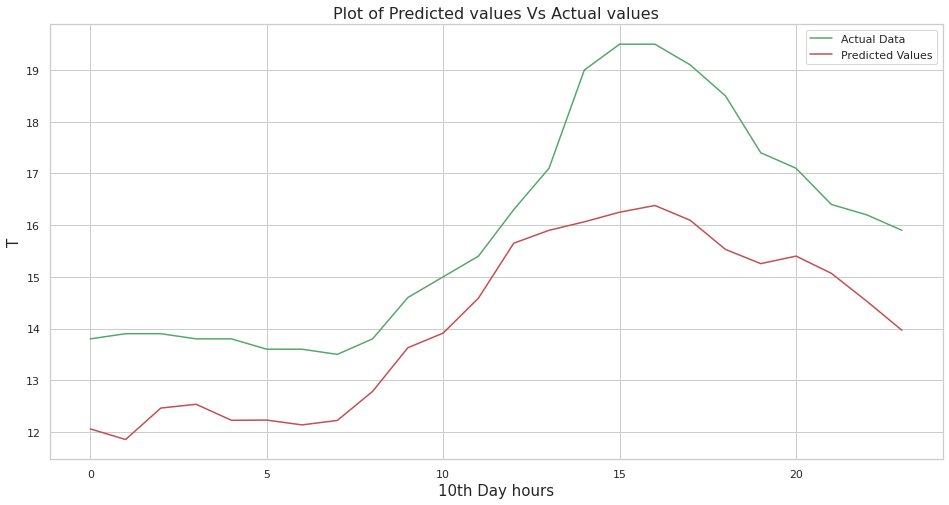

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday10,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('10th Day hours',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

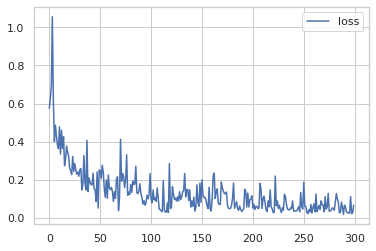

In [ ]:
import pandas as pd
pd.DataFrame(history_10th_day.history).plot();

##DAY 11 MAPE CALCULATION FOR TEMPERATURE

In [ ]:

#Updating the next day data
train_data_04 = fulldataset[:240]
test_data_04 = fulldataset[240:]

#Saving the new dataframe
train_data_04.to_csv("train_data_04.csv")
test_data_04.to_csv("test_data_04.csv")

train_data_04 = pd.read_csv('/content/train_data_04.csv',index_col = [0],parse_dates=True)
train_data_04 = train_data_04.drop(['CO(GT)'],axis = 1)

dataf = transform_to_hour_cols(train_data_04['T'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 11
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 9, idx=0, multivar=False)

n_hour = X.shape[-1]
n_lag = X.shape[1]
#model
model = lstm(n_lags = n_lag, n_hours = n_hour)
history_11th_day = model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_04 = test_data_04['T']
testday11 = test_data_04[0:24]
testday11 = np.array([testday11])
testday11 = np.array([testday11])
testday11 = testday11.reshape(-1)

#Calculation for MAPE
temp_mape4 = mean_absolute_percentage_error(testday11,predictions)
print('DAY 11 MAPE FOR T -- >' , temp_mape4)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 11 MAPE FOR T -- > 0.08412872124044009


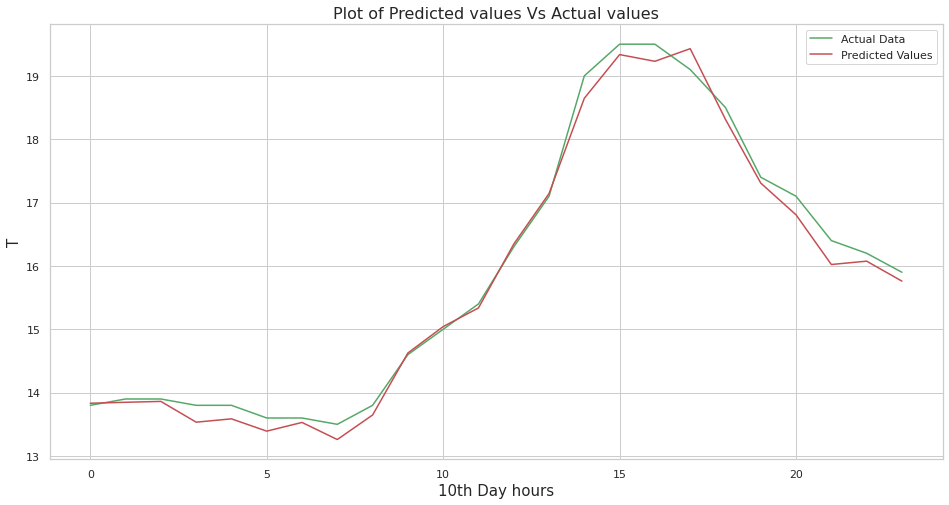

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday10,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('10th Day hours',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

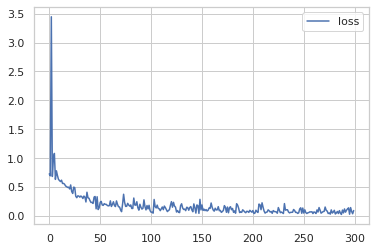

In [ ]:
import pandas as pd
pd.DataFrame(history_11th_day.history).plot();

##DAY 12 MAPE CALCULATION FOR TEMPERATURE

In [ ]:

#Updating the next day data
train_data_05 = fulldataset[:264]
test_data_05 = fulldataset[264:]

#Saving the new dataframe
train_data_05.to_csv("train_data_05.csv")
test_data_05.to_csv("test_data_05.csv")

train_data_05 = pd.read_csv('/content/train_data_05.csv',index_col = [0],parse_dates=True)
train_data_05 = train_data_05.drop(['CO(GT)'],axis = 1)

dataf = transform_to_hour_cols(train_data_05['T'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 12
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 10, idx=0, multivar=False)

n_hour = X.shape[-1]
n_la = X.shape[1]
#model
model = lstm(n_lags = n_la, n_hours = n_hour)
history_12th_day = model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_05 = test_data_05['T']
testday12 = test_data_05[0:24]
testday12 = np.array([testday12])
testday12 = np.array([testday12])
testday12 = testday12.reshape(-1)

#Calculation for MAPE
temp_mape5 = mean_absolute_percentage_error(testday12,predictions)
print('DAY 12 MAPE FOR T -- >' ,temp_mape5)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 12 MAPE FOR T -- > 0.09561549837740219


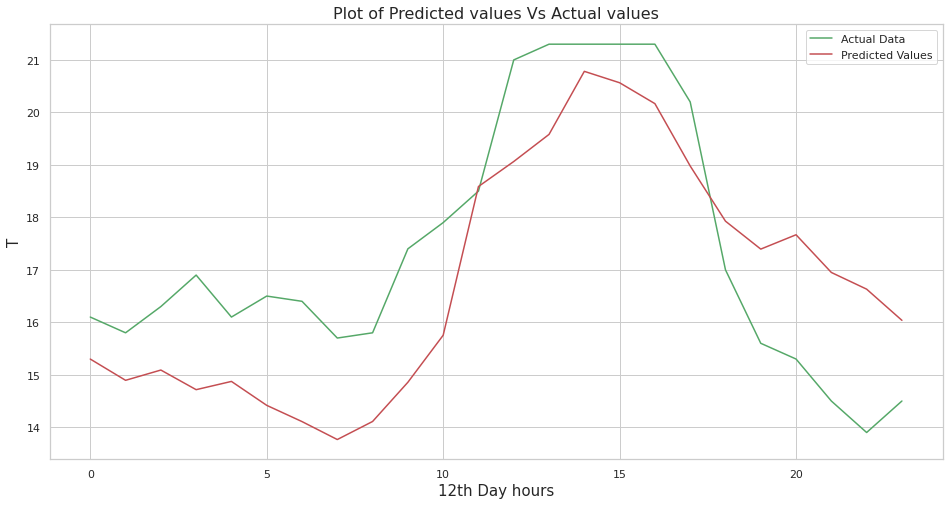

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday12,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('12th Day hours',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

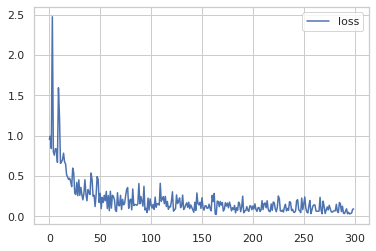

In [ ]:
import pandas as pd
pd.DataFrame(history_12th_day.history).plot();

##DAY 13 MAPE CALCULATION FOR CO(GT)

In [ ]:

#Updating the next day data
train_data_06 = fulldataset[:288]
test_data_06 = fulldataset[288:]

#Saving the new dataframe
train_data_06.to_csv("train_data_06.csv")
test_data_06.to_csv("test_data_06.csv")

train_data_06 = pd.read_csv('/content/train_data_06.csv',index_col = [0],parse_dates=True)
train_data_06 = train_data_06.drop(['CO(GT)'],axis = 1)

dataf = transform_to_hour_cols(train_data_06['T'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 13
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 11, idx=0, multivar=False)

n_hour = X.shape[-1]
n_la = X.shape[1]
#model
model = lstm(n_lags = n_la, n_hours = n_hour)
history_13th_day =model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_06 = test_data_06['T']
testday13 = test_data_06[0:24]
testday13 = np.array([testday13])
testday13 = np.array([testday13])
testday13 = testday13.reshape(-1)

#Calculation for MAPE
temp_mape6 = mean_absolute_percentage_error(testday13,predictions)
print('DAY 13 MAPE FOR T -- >' , temp_mape6)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 13 MAPE FOR T -- > 0.4171909168305102


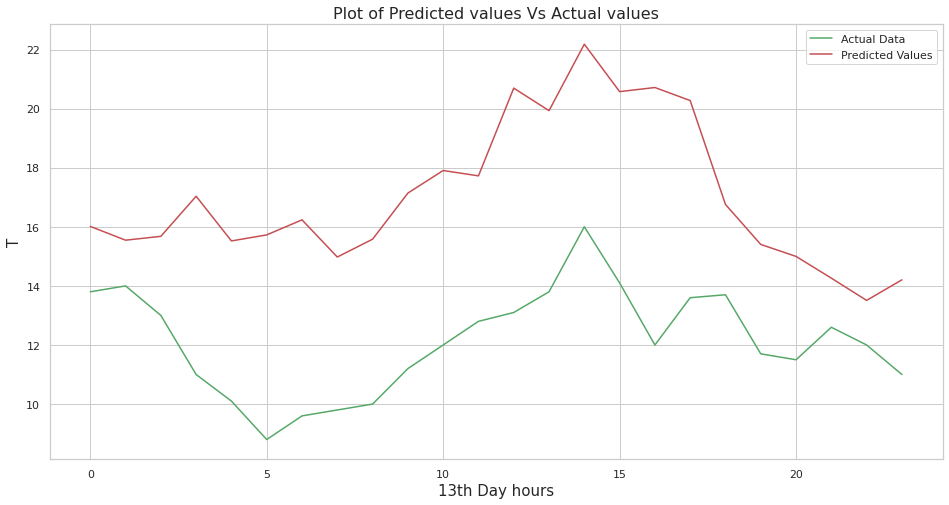

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday13,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('13th Day hours',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

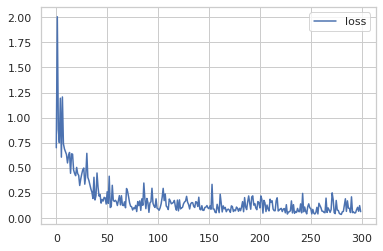

In [ ]:
import pandas as pd
pd.DataFrame(history_13th_day.history).plot();

## DAY 14 MAPE CALCULATION FOR TEMPERATURE

In [ ]:

#Updating the next day data
train_data_07 = fulldataset[:312]
test_data_07 = fulldataset[312:]

#Saving the new dataframe
train_data_07.to_csv("train_data_07.csv")
test_data_07.to_csv("test_data_07.csv")

train_data_07 = pd.read_csv('/content/train_data_07.csv',index_col = [0],parse_dates=True)
train_data_07 = train_data_07.drop(['CO(GT)'],axis = 1)

dataf = transform_to_hour_cols(train_data_07['T'])

#normalize the dataframe
data_normed, scaler = normalize_df(dataf)

#create the supervised learning problem
n_steps = 14
X, Y = split_sequences(data_normed.values, n_steps, extra_lag=True, long_lag_step=1, max_step= 12, idx=0, multivar=False)

n_hour = X.shape[-1]
n_la = X.shape[1]
#model
model = lstm(n_lags = n_la, n_hours = n_hour)
history_14th_day = model.fit(X, Y, epochs= 300, shuffle=False,verbose =0)

#predicted data
predictions,actuals = pred(model)
predictions = predictions.reshape(-1)

#Creating my actual data and reshaping it
test_data_07 = test_data_07['T']
testday14 = test_data_07[0:24]
testday14 = np.array([testday14])
testday14 = np.array([testday14])
testday14 = testday14.reshape(-1)

#Calculation for MAPE
temp_mape7 = mean_absolute_percentage_error(testday14,predictions)
print('DAY 14 MAPE FOR  T -- >' , temp_mape7)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


DAY 14 MAPE FOR  T -- > 0.13772579239220237


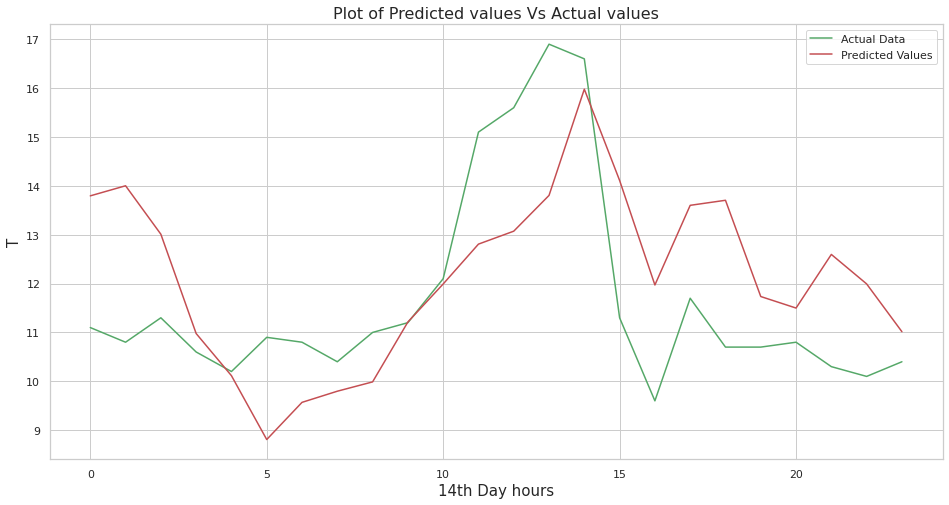

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots, show

plt.figure(figsize=(16,8))
plt.plot(testday14,c='g',label="Actual Data")
plt.plot(predictions,c='r',label="Predicted Values")
plt.xlabel('14th Day hours',fontsize=15)
plt.ylabel('T',fontsize=15)
plt.legend()
plt.title("Plot of Predicted values Vs Actual values",fontsize=16);

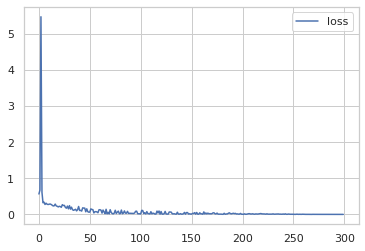

In [ ]:
import pandas as pd
pd.DataFrame(history_14th_day.history).plot();

## AVERAGE MAPE FOR 7 DAYS OF TEMPERATURE

In [ ]:
temp_mean_mape = (temp_mape1 + temp_mape2 + temp_mape3 + temp_mape4 + temp_mape5 + temp_mape6 + temp_mape7)/7
temp_mean_mape

0.16644363040791016

In [ ]:
print('RESULTS OBTAINED: ')
print('1) CO(GT) -')
print('DAY 8 - ',co_mape1)
print('DAY 9 - ',co_mape2)
print('DAY 10 - ',co_mape3)
print('DAY 11 - ',co_mape4)
print('DAY 12 - ',co_mape5)
print('DAY 13 - ',co_mape6)
print('DAY 14 - ',co_mape7)
print('AVERAGE MAPE FOR CO(GT) FOR NEXT 7 DAYS -',co_mean_mape)

print('2) T -')
print('DAY 8 - ',temp_mape1)
print('DAY 9 - ',temp_mape2)
print('DAY 10 - ',temp_mape3)
print('DAY 11 - ',temp_mape4)
print('DAY 12 - ',temp_mape5)
print('DAY 13 - ',temp_mape6)
print('DAY 14 - ',temp_mape7)
print('AVERAGE MAPE FOR CO(GT) FOR NEXT 7 DAYS -',temp_mean_mape)

RESULTS OBTAINED: 
1) CO(GT) -
DAY 8 -  0.2200902977841356
DAY 9 -  0.1590087746067832
DAY 10 -  0.47192265208226036
DAY 11 -  0.3033819631855403
DAY 12 -  0.6428422259212377
DAY 13 -  0.35999804071456004
DAY 14 -  0.2986168139534348
AVERAGE MAPE FOR CO(GT) FOR NEXT 7 DAYS - 0.35083725260685034
2) T -
DAY 8 -  0.062341400492079625
DAY 9 -  0.26023228793361763
DAY 10 -  0.10787079558911898
DAY 11 -  0.08412872124044009
DAY 12 -  0.09561549837740219
DAY 13 -  0.4171909168305102
DAY 14 -  0.13772579239220237
AVERAGE MAPE FOR CO(GT) FOR NEXT 7 DAYS - 0.16644363040791016
